In [42]:
# Import statements
import numpy as np
import time
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import sys

## Creating the Data Structures for Prim's algorithm

In [30]:
class Graph:
    def __init__(self, num_of_nodes):
        self.V = num_of_nodes
        # Initialize the adjacency matrix with zeros
        self.graph = [[0 for column in range(num_of_nodes)] 
                    for row in range(num_of_nodes)]

    def add_edge(self, node1, node2, weight):
        self.graph[node1][node2] = weight
        self.graph[node2][node1] = weight
        
    def minKey(self, key, mstSet):
        min_val, min_index = sys.maxsize, -1
 
        for v in range(self.V):
            if key[v] < min_val and mstSet[v] == False:
                min_val = key[v]
                min_index = v
                
        return min_index

            
    def prims_mst(self):
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
        parent[0] = -1 # First node is always the root of

        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        parent[v] = u
        for i in range(len(graph.graph)):
            for j in range(0 + i, len(graph.graph)):
                if graph.graph[i][j] != 0:
                    print("%d - %d: %d" % (i, j, graph.graph[i][j]))
#         self.printMST(parent)


## Creating the Data Structures of Kruskal's Algorithm

In [31]:
class Graph_2:
    def __init__(self, num_of_nodes):
        self.m_num_of_nodes = num_of_nodes
        self.m_graph = []

    def add_edge(self, node1, node2, weight):
        self.m_graph.append([node1, node2, weight])

    # Finds the root node of a subtree containing node `i`
    def find_subtree(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_subtree(parent, parent[i])

    # Connects subtrees containing nodes `x` and `y`
    def connect_subtrees(self, parent, subtree_sizes, x, y):
        xroot = self.find_subtree(parent, x)
        yroot = self.find_subtree(parent, y)
        if subtree_sizes[xroot] < subtree_sizes[yroot]:
            parent[xroot] = yroot
        elif subtree_sizes[xroot] > subtree_sizes[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            subtree_sizes[xroot] += 1
            
    def kruskals_mst(self):
        # Resulting tree
        result = []

        # Iterator
        i = 0
        # Number of edges in MST
        e = 0

        # Sort edges by their weight
#         print(self.m_graph)
        self.m_graph = sorted(self.m_graph, key=lambda item: item[2])
#         print(self.m_graph)
#         Auxiliary arrays
        parent = []
        subtree_sizes = []

        # Initialize `parent` and `subtree_sizes` arrays
        for node in range(self.m_num_of_nodes):
            parent.append(node)
            subtree_sizes.append(0)

        # Important property of MSTs
        # number of egdes in a MST is 
        # equal to (m_num_of_nodes - 1)
        while e < (self.m_num_of_nodes - 1) and i < self.m_num_of_nodes:
            # Pick an edge with the minimal weight
            node1, node2, weight = self.m_graph[i]
#             print(i, e)
            i = i + 1

            x = self.find_subtree(parent, node1)
            y = self.find_subtree(parent, node2)

            if x != y:
                e = e + 1
                result.append([node1, node2, weight])
                self.connect_subtrees(parent, subtree_sizes, x, y)

        # Print the resulting MST
        for node1, node2, weight in result:
            print("%d - %d: %d" % (node1, node2, weight))

# User Input

In [32]:
print('****************************** MST Algorithms ******************************')
print('1. Kruskal Algorithm')
print('2. Prims Algorithm')
choice = int(input('Select an Algorithm for testing (Enter choice): '))

****************************** MST Algorithms ******************************
1. Kruskal Algorithm
2. Prims Algorithm
Select an Algorithm for testing (Enter choice): 2


In [33]:
n = int(input('Enter Input size: '))

Enter Input size: 5


In [36]:
x = list(np.random.randint(low = 0,high = n - 1,size = 5*n))
y = list(np.random.randint(low = 0,high = n - 1,size = 5*n))
weights = list(np.random.randint(low = 1,high = 1000,size = 5*n))

In [37]:
graph = 0
if choice == 1:
    graph = Graph_2(n)
else:
    graph = Graph(n)

for i in range(n):
    graph.add_edge(x[i], y[i], weights[i])

# ALl printing in the form (x, y, weight)
# Initial Graph
print('Initial Graph')
if choice == 1:
    for node1, node2, weight in graph.m_graph:
        print("%d - %d: %d" % (node1, node2, weight))
else:
    for i in range(len(graph.graph)):
        for j in range(0 + i, len(graph.graph)):
            if graph.graph[i][j] != 0:
                print("%d - %d: %d" % (i, j, graph.graph[i][j]))

start_time = time.time()
# MST
if choice == 1:    
    print('MST from Kruskals')
    graph.kruskals_mst()
else:
    print('MST from Prims')
    graph.prims_mst()
time_taken = (time.time() - start_time)
print('Time taken by the algorithm is')
print("--- %s seconds ---" % (time_taken))

Initial Graph
0 - 2: 629
0 - 3: 947
1 - 2: 991
3 - 3: 421
MST from Prims
0 - 2: 629
0 - 3: 947
1 - 2: 991
3 - 3: 421
Time taken by the algorithm is
--- 0.0010013580322265625 seconds ---


# Bonus

In [39]:
print('Comparing with the other choice we get the runtime and MST as')
print('Initial Graph')
graph = 0
if choice == 2:
    graph = Graph_2(n)
    for i in range(n):
        graph.add_edge(x[i], y[i], weights[i])
    for node1, node2, weight in graph.m_graph:
        print("%d - %d: %d" % (node1, node2, weight))
else:
    graph = Graph(n)
    for i in range(n):
        graph.add_edge(x[i], y[i], weights[i])
    for i in range(len(graph.graph)):
        for j in range(0 + i, len(graph.graph)):
            if graph.graph[i][j] != 0:
                print("%d - %d: %d" % (i, j, graph.graph[i][j]))

# ALl printing in the form (x, y, weight)
# Initial Graph
start_time = time.time()
# MST
if choice == 2:    
    print('MST from Kruskals')
    graph.kruskals_mst()
else:
    print('MST from Prims')
    graph.prims_mst()
time_taken = (time.time() - start_time)
print("--- %s seconds ---" % (time_taken))

Comparing with the other choice we get the runtime and MST as
Initial Graph
0 - 3: 328
3 - 3: 421
0 - 3: 947
1 - 2: 991
0 - 2: 629
MST from Kruskals
0 - 3: 328
0 - 2: 629
1 - 2: 991
--- 0.0 seconds ---


## Comparison with respect to size and runtime

In [40]:
prims, krusk, n_list = [], [], [i for i in range(3, 11)]
for n in n_list:
    graph = Graph(n)
    graph_2 = Graph_2(n)
    x = list(np.random.randint(low = 0,high = n - 1,size = 2*n))
    y = list(np.random.randint(low = 0,high = n - 1,size = 2*n))
    weights = list(np.random.randint(low = 1,high = 1000,size = 2*n))
    for i in range(n):
        graph.add_edge(x[i], y[i], weights[i])
        graph_2.add_edge(x[i], y[i], weights[i])
    start_time = time.time()
    graph.prims_mst()
    time_taken = (time.time() - start_time)
    prims.append(time_taken)
    
    start_time = time.time()
    graph_2.kruskals_mst()
    time_taken = (time.time() - start_time)
    krusk.append(time_taken)

0 - 1: 511
1 - 1: 679
0 - 1: 496
0 - 2: 290
1 - 2: 117
2 - 1: 57
0 - 2: 290
0 - 0: 736
0 - 2: 776
0 - 3: 796
1 - 1: 894
2 - 3: 897
2 - 0: 776
3 - 0: 796
0 - 1: 3
0 - 2: 741
0 - 3: 82
1 - 3: 689
4 - 4: 979
0 - 1: 3
0 - 3: 82
0 - 2: 741
0 - 1: 354
0 - 3: 429
0 - 5: 938
3 - 5: 886
4 - 5: 534
0 - 1: 82
5 - 4: 162
3 - 0: 429
3 - 5: 886
0 - 2: 804
0 - 5: 498
1 - 3: 778
1 - 4: 667
1 - 6: 237
2 - 6: 657
3 - 5: 554
6 - 6: 209
6 - 1: 237
5 - 0: 498
3 - 5: 554
6 - 2: 657
4 - 1: 667
1 - 3: 778
0 - 0: 86
1 - 6: 439
1 - 7: 907
2 - 3: 850
4 - 4: 505
4 - 6: 867
4 - 7: 857
5 - 7: 169
6 - 7: 492
5 - 7: 169
1 - 6: 439
6 - 7: 492
3 - 2: 850
4 - 7: 857
0 - 1: 860
1 - 6: 773
2 - 3: 265
2 - 5: 741
3 - 3: 959
3 - 7: 868
5 - 7: 503
5 - 8: 866
6 - 8: 900
2 - 3: 265
6 - 8: 318
7 - 5: 503
2 - 5: 741
6 - 1: 773
1 - 0: 860
8 - 5: 866


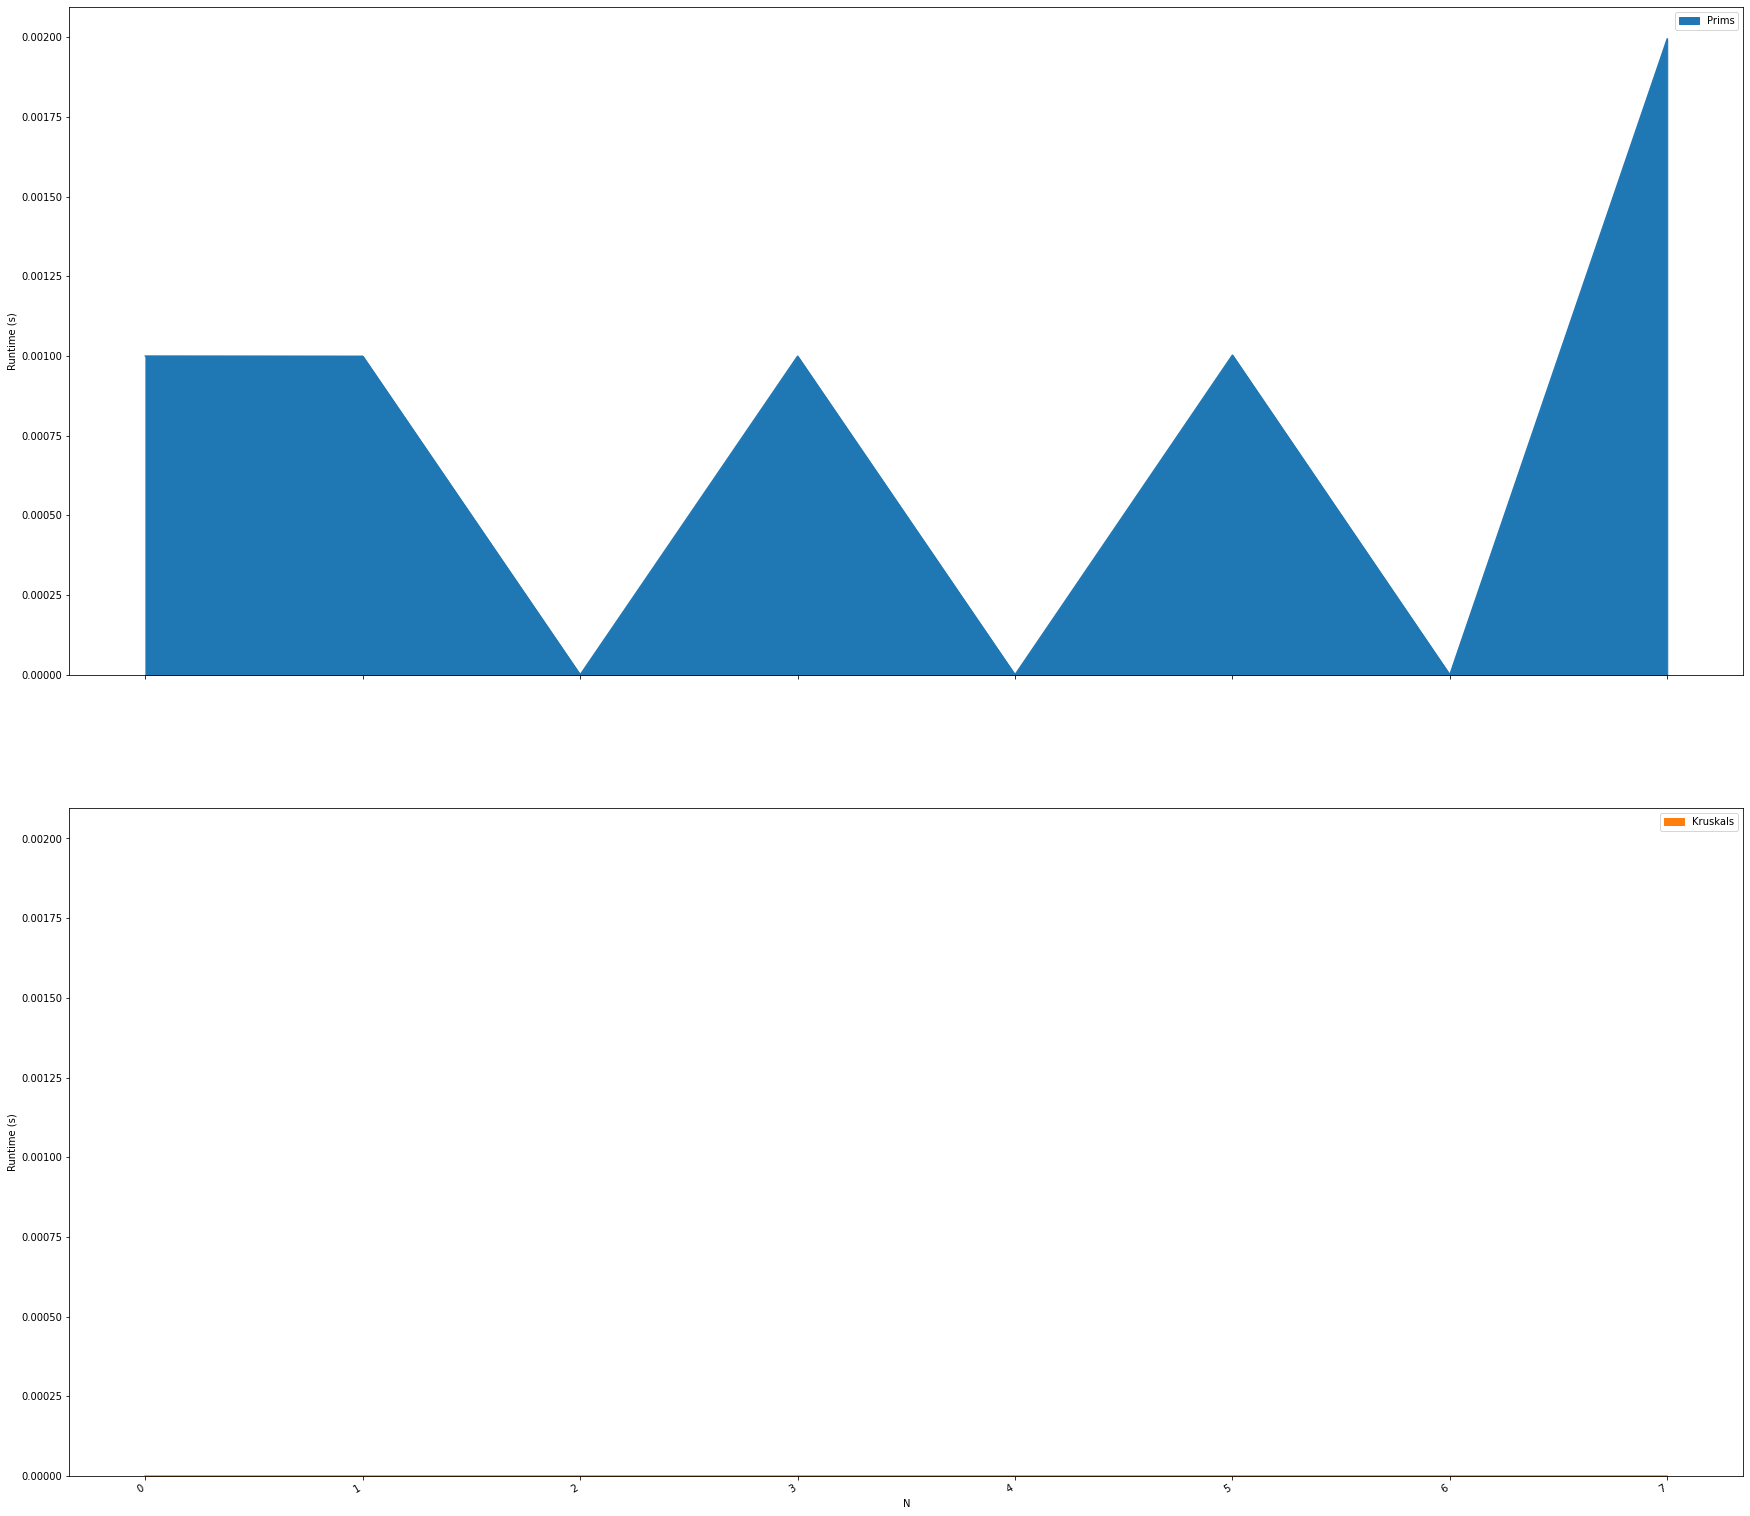

In [45]:
df = {'Prims' : prims, 'Kruskals' : krusk}
df = pd.DataFrame(df)
df.plot(kind = 'area', subplots = True, layout = (2, 1), figsize = (30, 30), xlabel = 'N', ylabel = 'Runtime (s)', sharex = True, sharey = True)
plt.savefig('Time_vs_N.pdf', dpi=300)

In [ ]:
# Conclusion
'''
Kruskal outperforms prim's by a lot of margin
'''